In [107]:
import pandas as pd
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [147]:
# dataset: Airline Passenger Satisfaction
# data from :https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

### Get data

In [5]:
train = pd.read_csv('C:/Users/User1/Desktop/DA/train.csv')
test = pd.read_csv('C:/Users/User1/Desktop/DA/test.csv')
data = pd.concat([train, test], axis=0)

In [10]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [12]:
data.shape

(103904, 24)

### Work with NANs

In [6]:
data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [7]:
data['Arrival Delay in Minutes'].fillna(value = data['Arrival Delay in Minutes'].mean(), inplace = True)


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [8]:
data.drop('id', axis=1, inplace = True)

### Data Categorization

In [9]:
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2}, inplace = True)


In [37]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Plotting

In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

<AxesSubplot:>

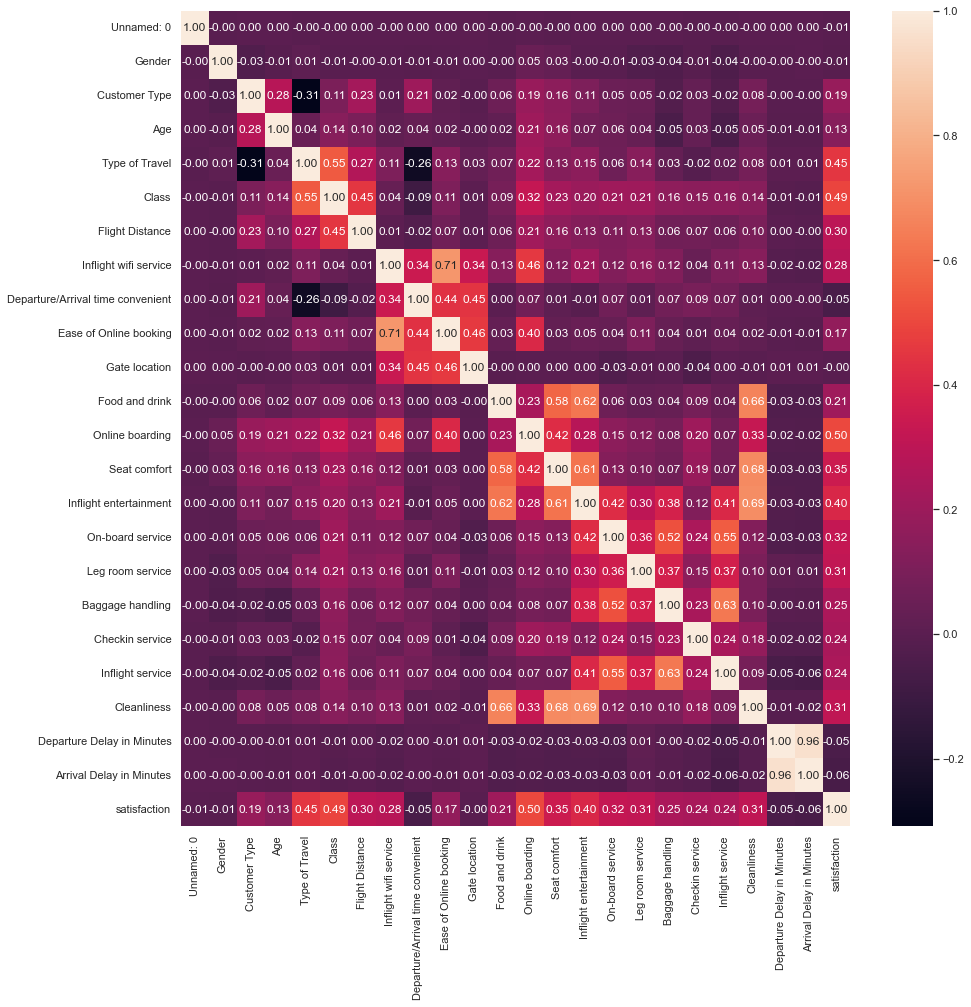

In [10]:
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')


In [14]:
def histPlots(df):
    for i in df.columns:
        plt.hist(df[str(i)], bins=10)
        plt.xlim(xmin=df[str(i)].min(), xmax = df[str(i)].max())
        plt.title(str(i))
        plt.show()

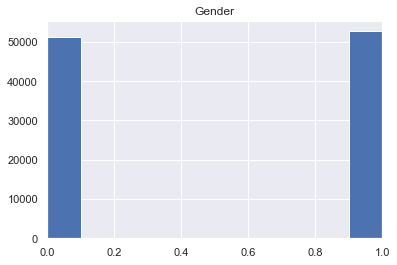

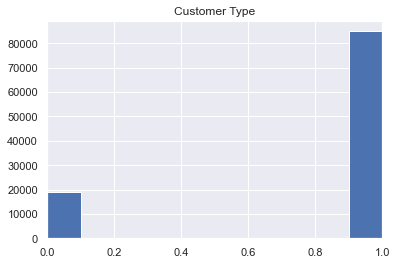

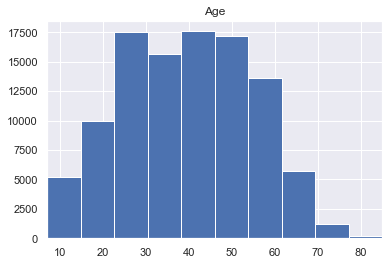

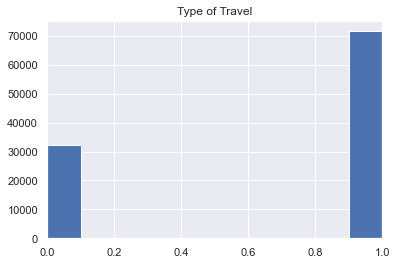

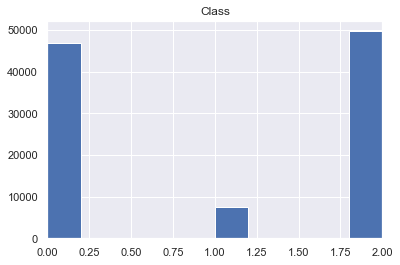

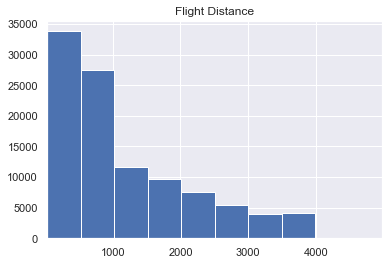

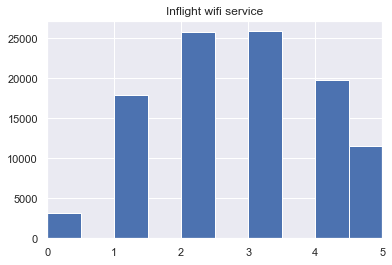

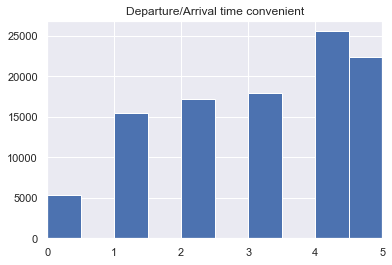

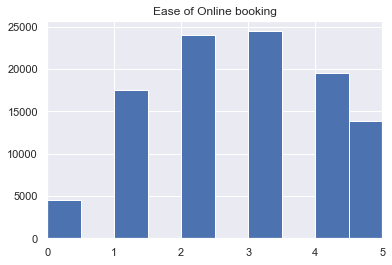

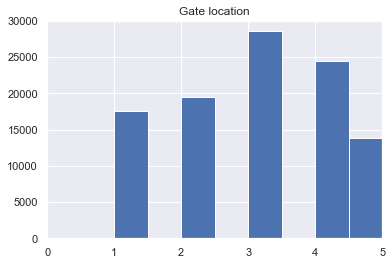

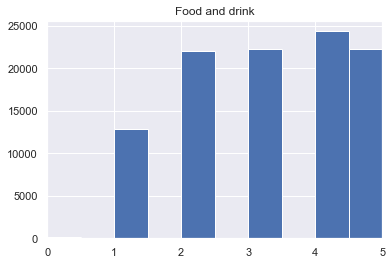

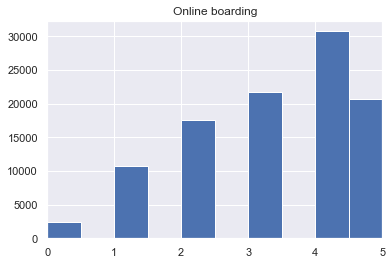

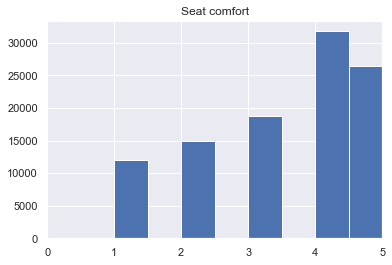

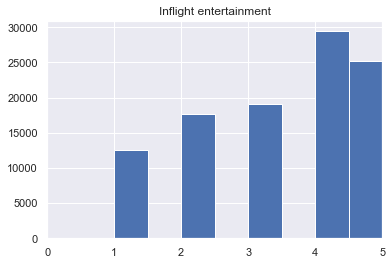

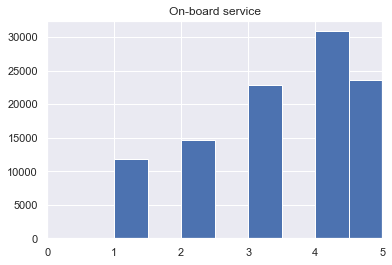

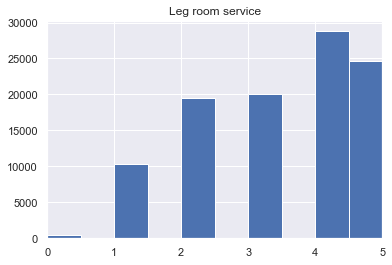

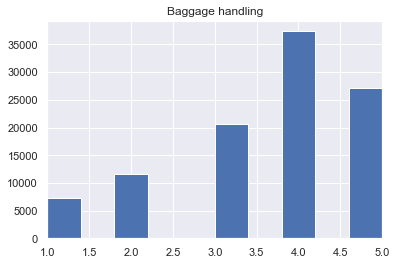

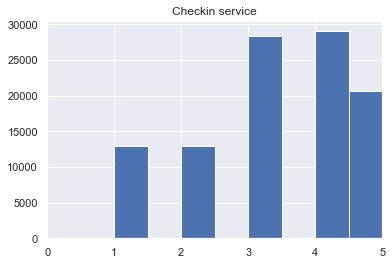

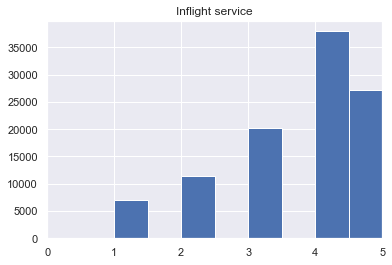

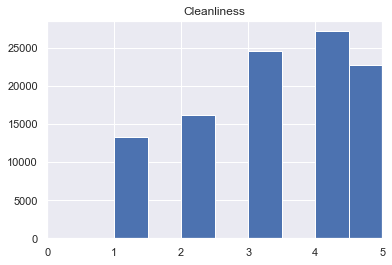

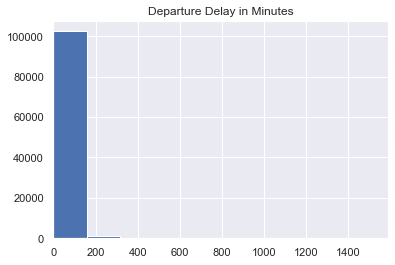

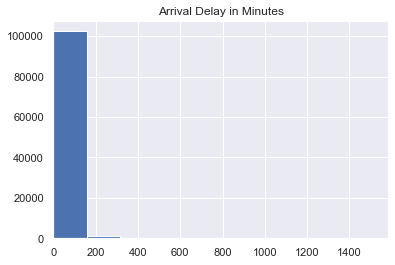

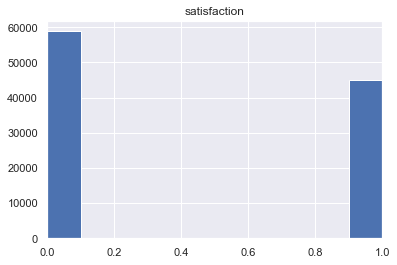

In [131]:
histPlots(data)

#### Outliers

In [11]:
def dropOutliers(df, columns, q=0.93):
    for i in columns:
        val = df[i].quantile(q)
        changedData = df[df[i] < val]
        df = changedData
    return df

In [12]:
dataWO_outliers = dropOutliers(data, ['Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes'], q=0.90)

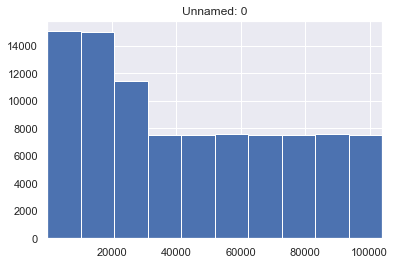

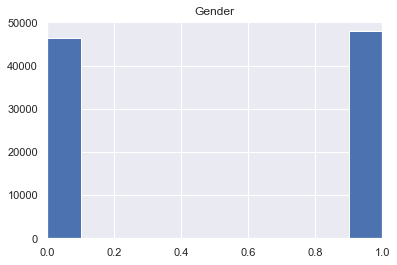

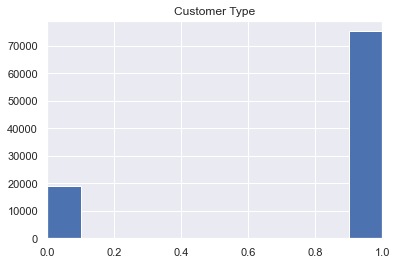

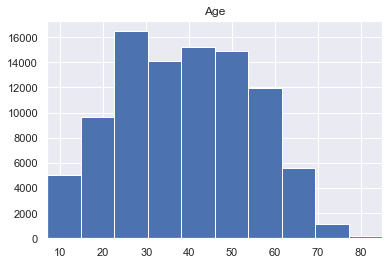

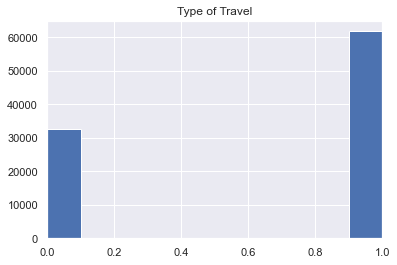

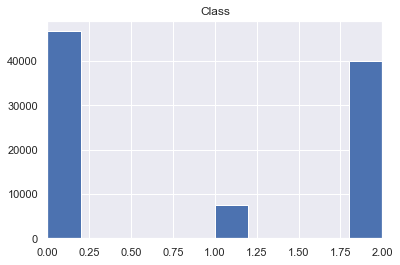

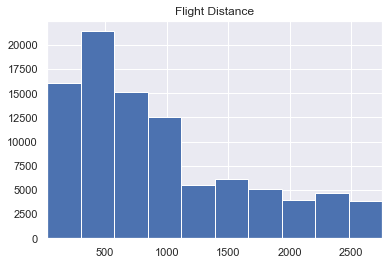

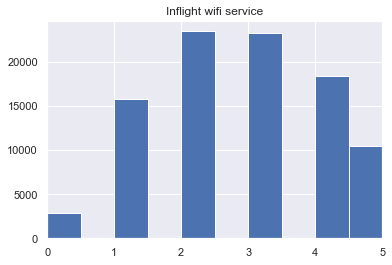

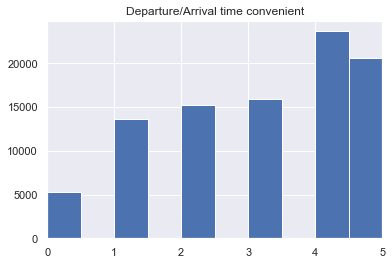

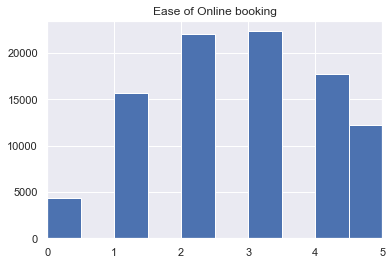

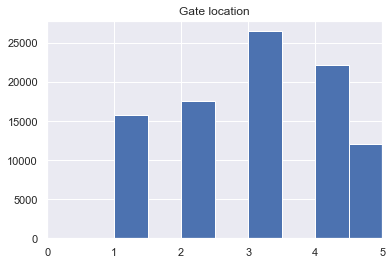

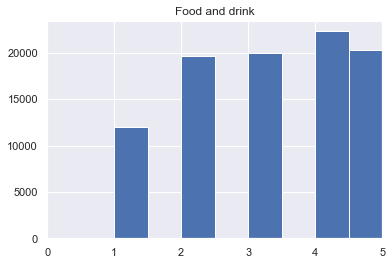

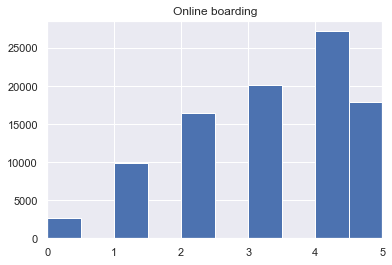

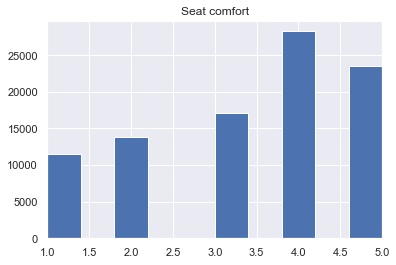

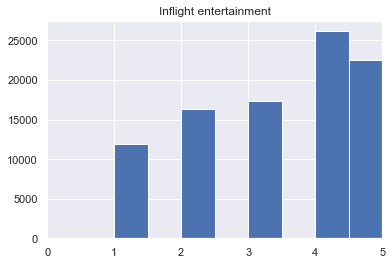

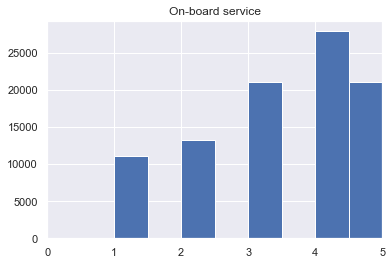

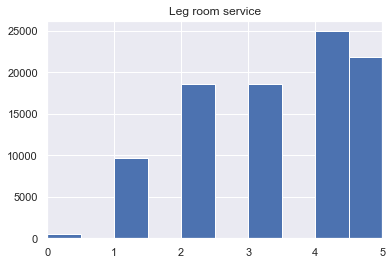

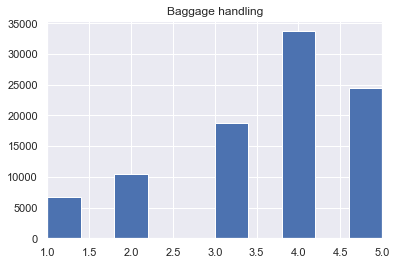

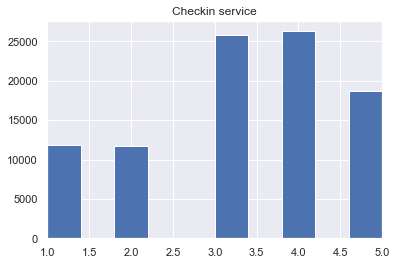

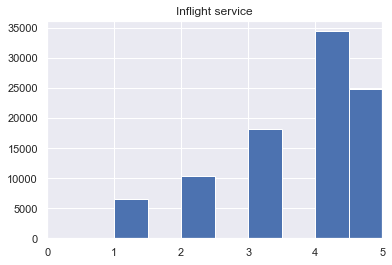

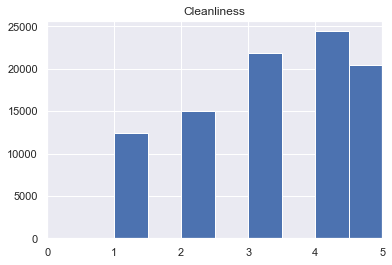

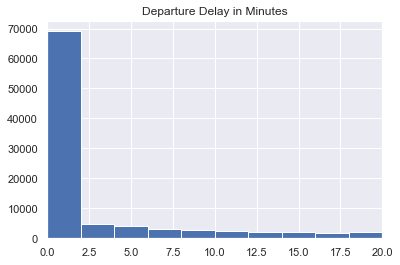

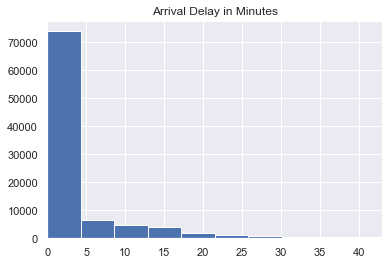

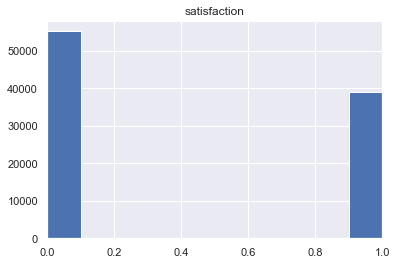

In [15]:
histPlots(dataWO_outliers)

D:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


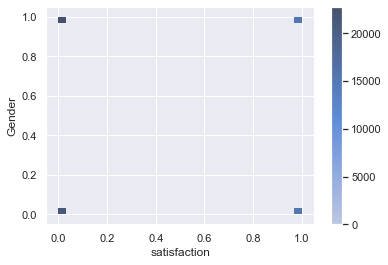

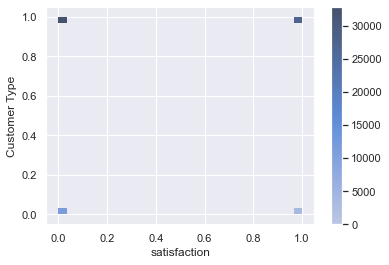

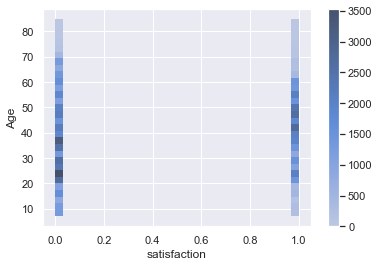

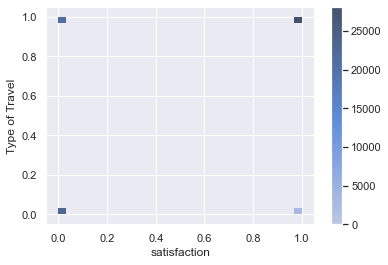

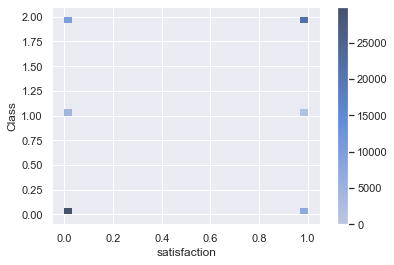

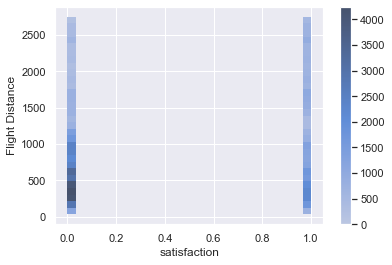

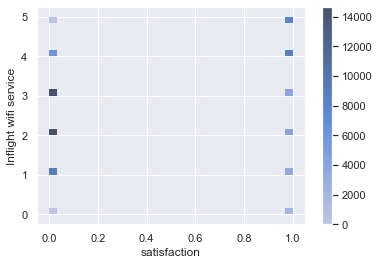

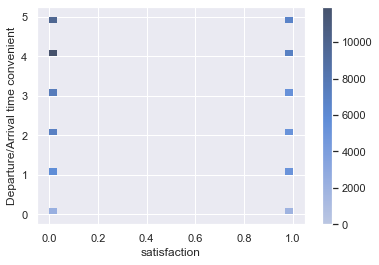

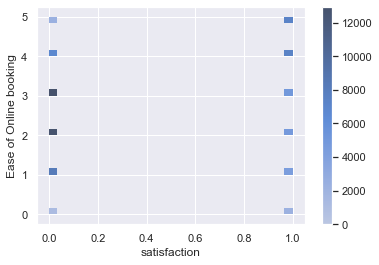

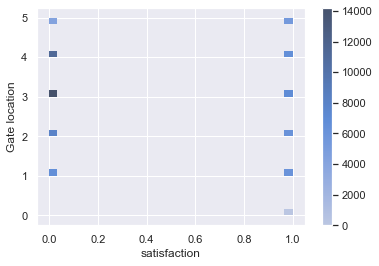

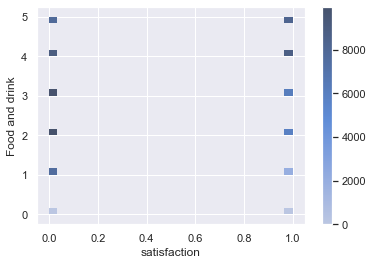

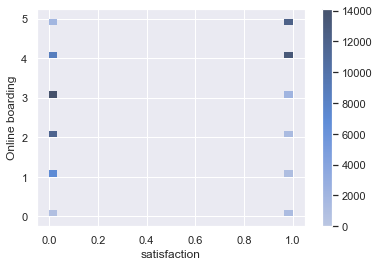

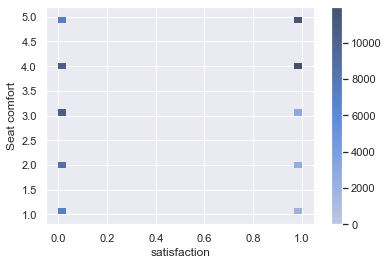

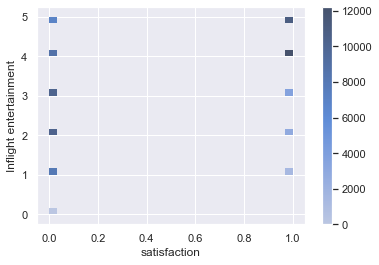

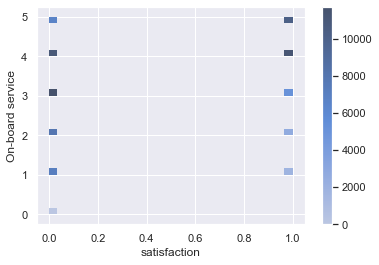

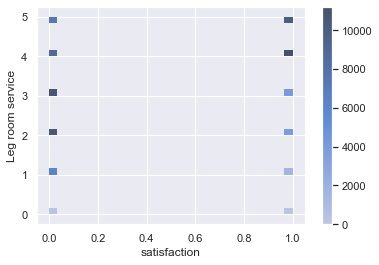

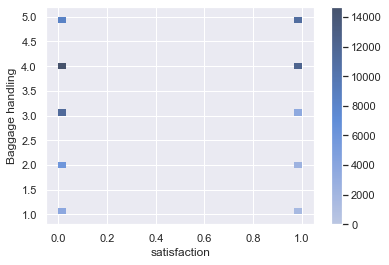

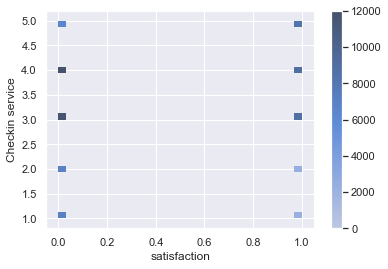

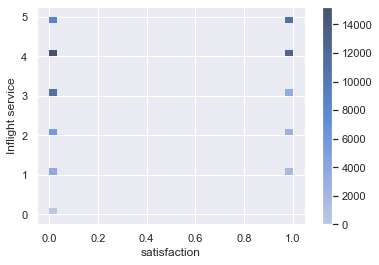

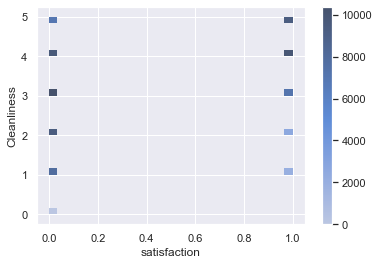

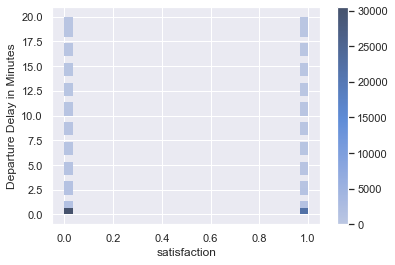

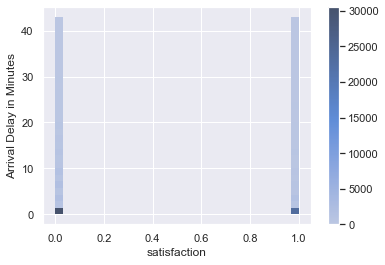

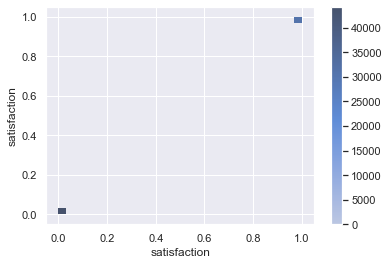

In [247]:
for i in dataWO_outliers.columns:
    plt.figure()
    sns.histplot(dataWO_outliers, y = str(i), x = 'satisfaction', bins=30, cbar=True)


D:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


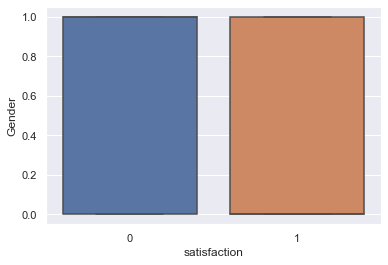

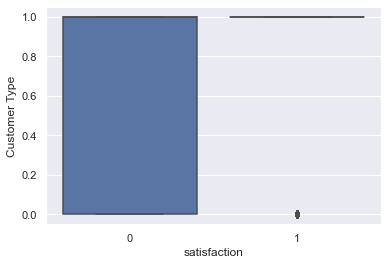

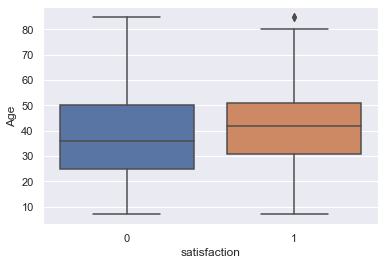

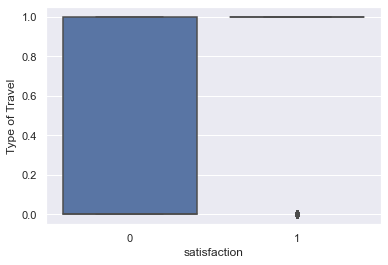

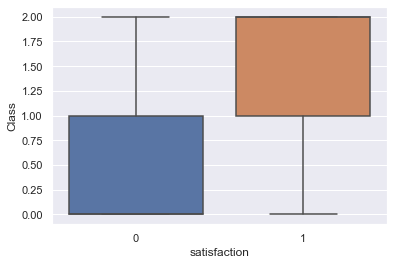

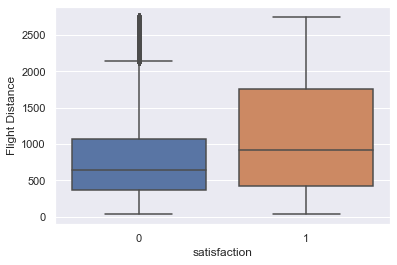

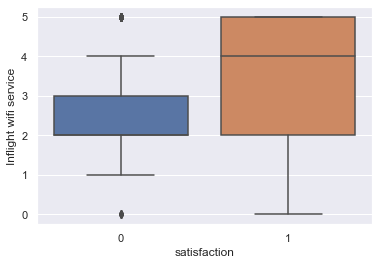

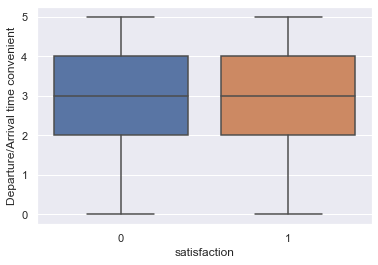

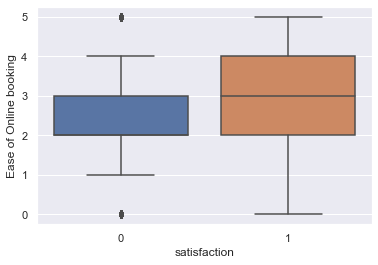

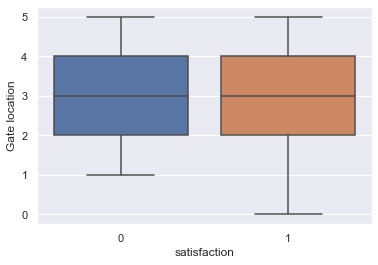

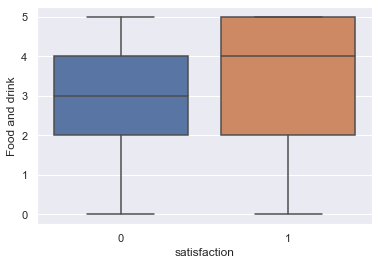

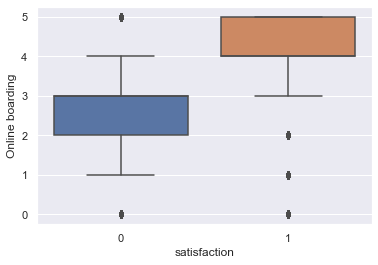

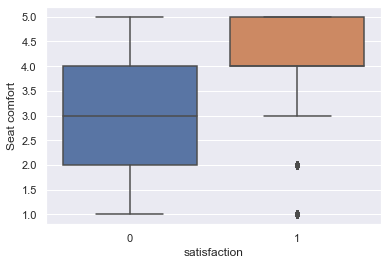

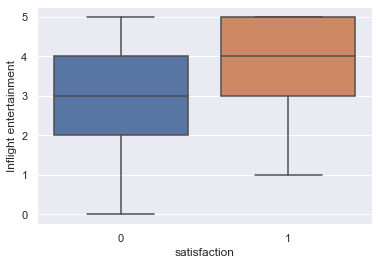

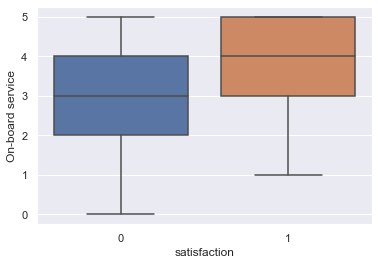

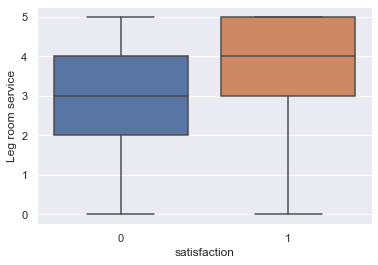

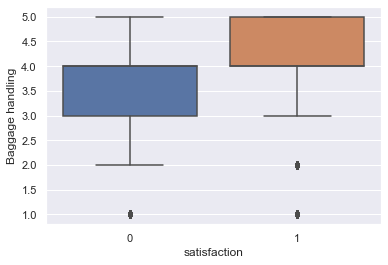

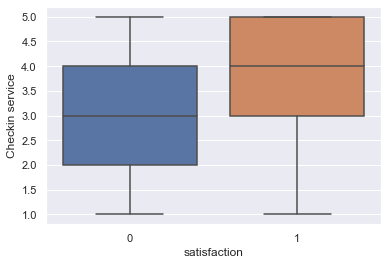

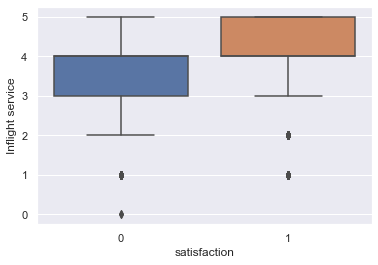

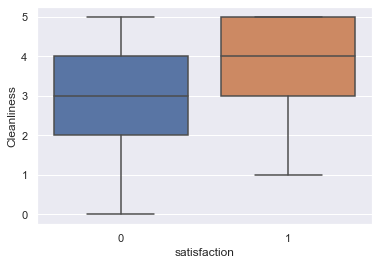

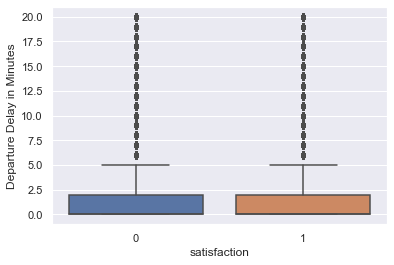

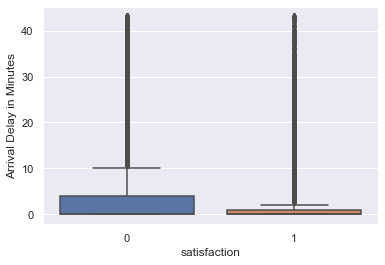

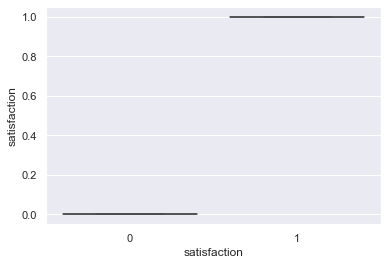

In [250]:
for i in dataWO_outliers.columns:
    plt.figure()
    sns.boxplot(y = dataWO_outliers[str(i)], x = dataWO_outliers['satisfaction'])


In [297]:
dataWO_outliers = dropOutliers(dataWO_outliers, ['Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes'], q=0.95)

D:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


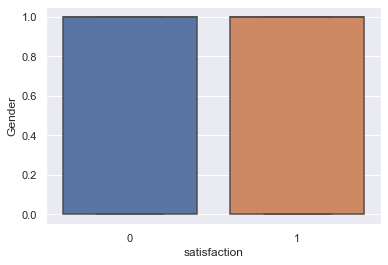

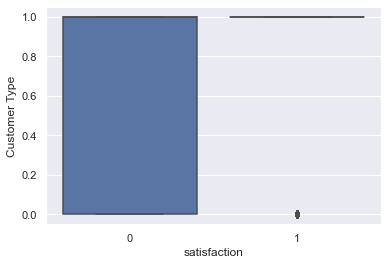

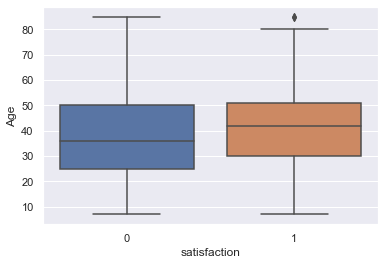

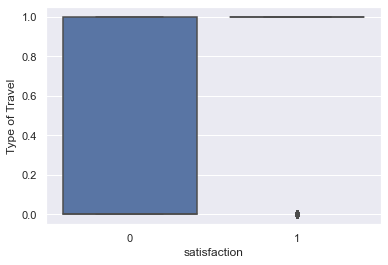

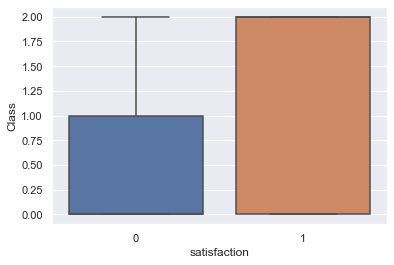

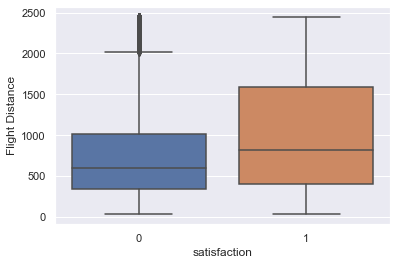

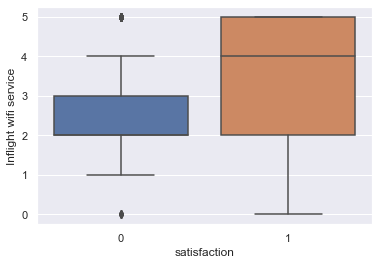

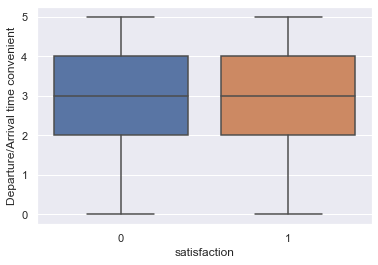

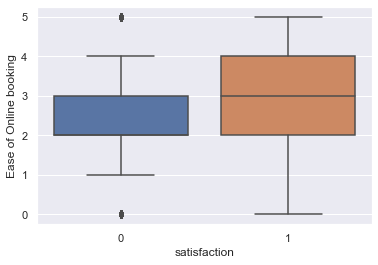

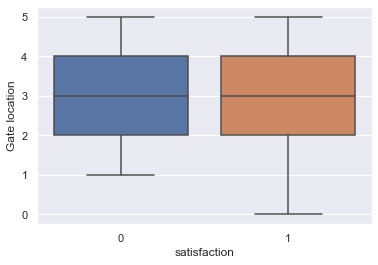

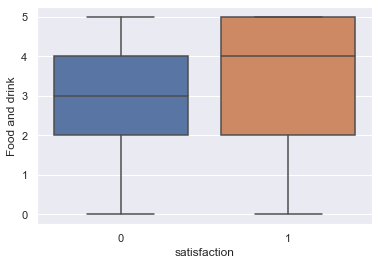

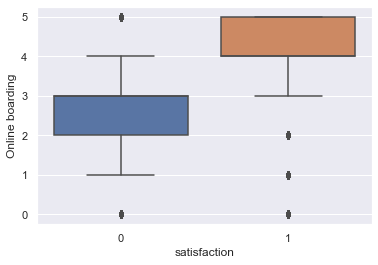

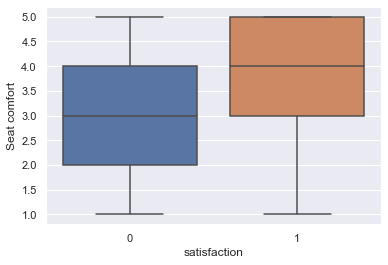

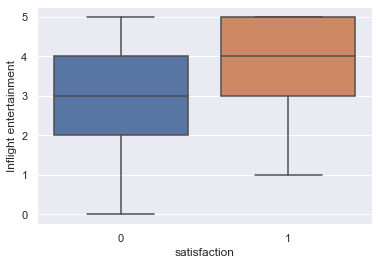

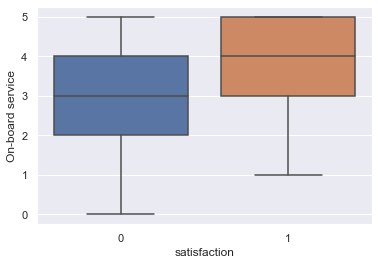

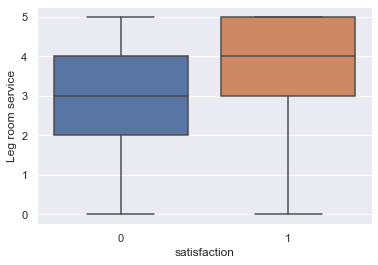

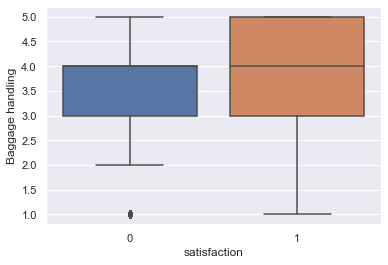

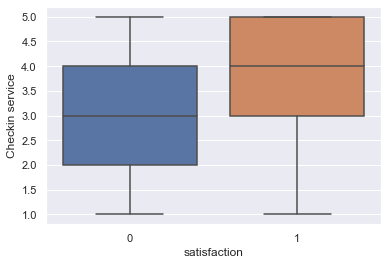

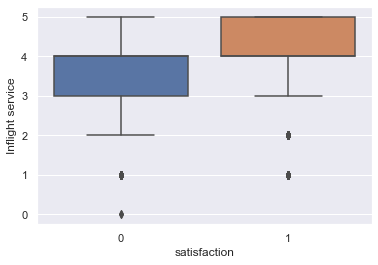

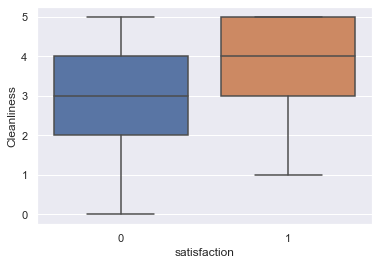

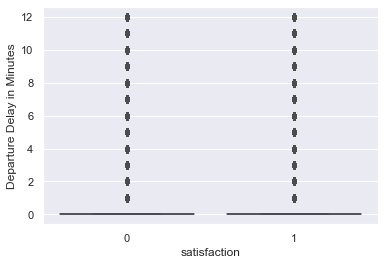

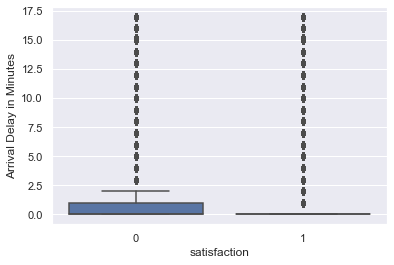

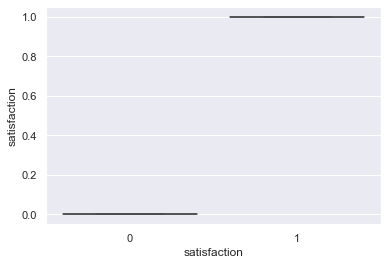

In [259]:
for i in dataWO_outliers.columns:
    plt.figure()
    sns.boxplot(y = dataWO_outliers[str(i)], x = dataWO_outliers['satisfaction'])


### Data Normalization

In [34]:
normData = preprocessing.normalize(dataWO_outliers.drop('satisfaction', axis=1), axis=0)
normData

array([[6.02154440e-08, 0.00000000e+00, 0.00000000e+00, ...,
        9.23518525e-04, 6.08648364e-04, 2.61168537e-03],
       [1.20430888e-07, 4.56706715e-03, 3.64560687e-03, ...,
        4.61759263e-03, 0.00000000e+00, 0.00000000e+00],
       [1.80646332e-07, 4.56706715e-03, 3.64560687e-03, ...,
        1.84703705e-03, 6.69513200e-03, 3.91752806e-03],
       ...,
       [1.56397573e-03, 4.56706715e-03, 3.64560687e-03, ...,
        1.84703705e-03, 0.00000000e+00, 0.00000000e+00],
       [1.56403594e-03, 0.00000000e+00, 3.64560687e-03, ...,
        3.69407410e-03, 0.00000000e+00, 0.00000000e+00],
       [1.56409616e-03, 4.56706715e-03, 3.64560687e-03, ...,
        9.23518525e-04, 0.00000000e+00, 0.00000000e+00]])

In [47]:
normDF = pd.DataFrame(normData, columns=[dataWO_outliers.drop('satisfaction', axis=1).columns])
# normDF['satisfaction'] = dataWO_outliers[['satisfaction']]
normDF['satisfaction']=list(dataWO_outliers['satisfaction'])
normDF.drop(columns=['Unnamed: 0'], inplace=True)

D:\Users\User1\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


### Models

In [48]:
X = normDF.drop('satisfaction', axis=1)
y = normDF['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Knn

In [111]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [112]:
predictedKnn = knn.predict(X_test)

In [113]:
print("Accuracy:",metrics.accuracy_score(y_test, predictedKnn))

Accuracy: 0.9121712852825822


In [114]:
confusion_matrix(y_test, predictedKnn)

array([[17316,   843],
       [ 1889, 11058]], dtype=int64)

In [116]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predictedKnn, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      0.95      0.93     18159
     class 1       0.93      0.85      0.89     12947

    accuracy                           0.91     31106
   macro avg       0.92      0.90      0.91     31106
weighted avg       0.91      0.91      0.91     31106



### RF

In [117]:
rf = RandomForestClassifier(max_depth=7, random_state=0)
rf.fit(X_train, y_train)
predictedRF = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictedRF))

Accuracy: 0.9285025397029512


In [118]:
confusion_matrix(y_test, predictedRF)

array([[17206,   953],
       [ 1271, 11676]], dtype=int64)

In [119]:
print(classification_report(y_test, predictedRF, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.95      0.94     18159
     class 1       0.92      0.90      0.91     12947

    accuracy                           0.93     31106
   macro avg       0.93      0.92      0.93     31106
weighted avg       0.93      0.93      0.93     31106



### Decision Tree

In [142]:
dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(X_train, y_train)
predictedDT = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictedDT))

Accuracy: 0.9382112775670288


In [143]:
confusion_matrix(y_test, predictedDT)

array([[17128,  1031],
       [  891, 12056]], dtype=int64)

In [144]:
print(classification_report(y_test, predictedDT, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.94      0.95     18159
     class 1       0.92      0.93      0.93     12947

    accuracy                           0.94     31106
   macro avg       0.94      0.94      0.94     31106
weighted avg       0.94      0.94      0.94     31106



### SVM

In [123]:
svc = svm.SVC()
svc = svc.fit(X_train, y_train)
predictedSVC = svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictedSVC))

Accuracy: 0.9391435735870893


In [124]:
confusion_matrix(y_test, predictedSVC)

array([[17405,   754],
       [ 1139, 11808]], dtype=int64)

In [125]:
print(classification_report(y_test, predictedSVC, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95     18159
     class 1       0.94      0.91      0.93     12947

    accuracy                           0.94     31106
   macro avg       0.94      0.94      0.94     31106
weighted avg       0.94      0.94      0.94     31106



### ADA

In [126]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada = ada.fit(X_train, y_train)
predictedADA = ada.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictedADA))

Accuracy: 0.9252877258406739


In [127]:
confusion_matrix(y_test, predictedADA)

array([[17091,  1068],
       [ 1256, 11691]], dtype=int64)

In [128]:
print(classification_report(y_test, predictedADA, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.94      0.94     18159
     class 1       0.92      0.90      0.91     12947

    accuracy                           0.93     31106
   macro avg       0.92      0.92      0.92     31106
weighted avg       0.93      0.93      0.93     31106



### Optimal parameters

### KNN

In [68]:
parameters = {'n_neighbors': [5, 7, 9, 10, 12],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'n_jobs': [-1]}

knn = KNeighborsClassifier()
knnGrid = GridSearchCV(estimator=knn,
             param_grid=parameters, cv = 3, verbose=2)
knnGrid.fit(X_train, y_train)
knnGrid.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform, total=  13.3s
[CV] algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s remaining:    0.0s


[CV]  algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform, total=  13.1s
[CV] algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform, total=  14.0s
[CV] algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance, total=  13.2s
[CV] algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance, total=  12.3s
[CV] algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance, total=  12.6s
[CV] algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=7, weights=uniform 
[CV]  algorithm=auto, metric=euclidean, n_jobs=-1, n_neighbors=7, weights=uniform, total=  13.9s
[C

[CV]  algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance, total=  12.2s
[CV] algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform 
[CV]  algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform, total=  12.6s
[CV] algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform 
[CV]  algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform, total=  12.8s
[CV] algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform 
[CV]  algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform, total=  12.1s
[CV] algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=distance 
[CV]  algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=distance, total=  12.6s
[CV] algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=distance 
[CV]  algorithm=auto, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=distance, total= 

[CV]  algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance, total=  12.3s
[CV] algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance, total=  12.0s
[CV] algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance, total=  12.5s
[CV] algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=7, weights=uniform 
[CV]  algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=7, weights=uniform, total=  12.7s
[CV] algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=7, weights=uniform 
[CV]  algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=7, weights=uniform, total=  12.5s
[CV] algorithm=ball_tree, metric=euclidean, n_jobs=-1, n_neighbors=7, weights=uniform 
[CV]  algorithm=ball_tree, metric=euclidean, n_job

[CV]  algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance, total=  12.3s
[CV] algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance, total=  12.9s
[CV] algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform 
[CV]  algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform, total=  13.3s
[CV] algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform 
[CV]  algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform, total=  12.9s
[CV] algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform 
[CV]  algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform, total=  13.0s
[CV] algorithm=ball_tree, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=distance 
[CV]  algorithm=ball_tree, metric=manhattan,

[CV]  algorithm=ball_tree, metric=minkowski, n_jobs=-1, n_neighbors=12, weights=distance, total=  13.6s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform, total=   7.9s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform, total=   7.7s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=uniform, total=   7.6s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance, total=   7.0s
[CV] algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=kd_tree, metric=euclidean, n_jobs=-1, n_neighbors=5,

[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=uniform, total=  12.5s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=uniform 
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=uniform, total=  12.1s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance, total=  11.6s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance, total=  11.7s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=9, weights=distance, total=  12.1s
[CV] algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=10, weights=uniform 
[CV]  algorithm=kd_tree, metric=manhattan, n_jobs=-1, n_neighbors=10

[CV]  algorithm=kd_tree, metric=minkowski, n_jobs=-1, n_neighbors=12, weights=distance, total=   8.0s
[CV] algorithm=kd_tree, metric=minkowski, n_jobs=-1, n_neighbors=12, weights=distance 
[CV]  algorithm=kd_tree, metric=minkowski, n_jobs=-1, n_neighbors=12, weights=distance, total=   8.1s
[CV] algorithm=kd_tree, metric=minkowski, n_jobs=-1, n_neighbors=12, weights=distance 
[CV]  algorithm=kd_tree, metric=minkowski, n_jobs=-1, n_neighbors=12, weights=distance, total=   8.3s


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 51.1min finished


{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_jobs': -1,
 'n_neighbors': 12,
 'weights': 'distance'}

In [129]:
knnOpt = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=12, weights='distance')
knnOpt.fit(X_train, y_train)
predknnOpt = knnOpt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predknnOpt))

Accuracy: 0.9258985404745065


In [130]:
confusion_matrix(y_test, predknnOpt)

array([[17344,   815],
       [ 1490, 11457]], dtype=int64)

In [131]:
print(classification_report(y_test, predknnOpt, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.92      0.96      0.94     18159
     class 1       0.93      0.88      0.91     12947

    accuracy                           0.93     31106
   macro avg       0.93      0.92      0.92     31106
weighted avg       0.93      0.93      0.93     31106



### SVM

In [83]:
parameters = {'C': [1, 1.5, 2.0, 2.5, 3.0],
              'gamma': ['scale', 'auto']}

svc = svm.SVC()
svcGrid = GridSearchCV(estimator=svc, param_grid=parameters, verbose=2, cv=2)
svcGrid.fit(X_train, y_train)
svcGrid.best_params_

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] C=1, gamma=scale ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=1, gamma=scale, total=  20.8s
[CV] C=1, gamma=scale ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s remaining:    0.0s


[CV] ................................. C=1, gamma=scale, total=  21.4s
[CV] C=1, gamma=auto .................................................
[CV] .................................. C=1, gamma=auto, total= 1.3min
[CV] C=1, gamma=auto .................................................
[CV] .................................. C=1, gamma=auto, total= 1.2min
[CV] C=1.5, gamma=scale ..............................................
[CV] ............................... C=1.5, gamma=scale, total=  19.2s
[CV] C=1.5, gamma=scale ..............................................
[CV] ............................... C=1.5, gamma=scale, total=  19.4s
[CV] C=1.5, gamma=auto ...............................................
[CV] ................................ C=1.5, gamma=auto, total= 1.2min
[CV] C=1.5, gamma=auto ...............................................
[CV] ................................ C=1.5, gamma=auto, total= 1.2min
[CV] C=2.0, gamma=scale ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 16.4min finished


{'C': 3.0, 'gamma': 'scale'}

In [87]:
parameters = {'C': [1, 1.5, 2.0, 2.5, 3.0, 5.0, 7.0, 10.0],
              'gamma': ['scale', 'auto']}

svc = svm.SVC()
svcRandom = RandomizedSearchCV(estimator=svc, param_distributions=parameters, verbose=2, cv=2)
svcRandom.fit(X_train, y_train)
svcRandom.best_params_

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] gamma=scale, C=1.5 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... gamma=scale, C=1.5, total=  20.8s
[CV] gamma=scale, C=1.5 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s remaining:    0.0s


[CV] ............................... gamma=scale, C=1.5, total=  23.5s
[CV] gamma=auto, C=2.5 ...............................................
[CV] ................................ gamma=auto, C=2.5, total= 1.3min
[CV] gamma=auto, C=2.5 ...............................................
[CV] ................................ gamma=auto, C=2.5, total= 1.7min
[CV] gamma=scale, C=2.5 ..............................................
[CV] ............................... gamma=scale, C=2.5, total=  21.5s
[CV] gamma=scale, C=2.5 ..............................................
[CV] ............................... gamma=scale, C=2.5, total=  21.2s
[CV] gamma=scale, C=7.0 ..............................................
[CV] ............................... gamma=scale, C=7.0, total=  30.1s
[CV] gamma=scale, C=7.0 ..............................................
[CV] ............................... gamma=scale, C=7.0, total=  35.4s
[CV] gamma=auto, C=10.0 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 18.2min finished


{'gamma': 'scale', 'C': 7.0}

In [132]:
svmOpt1 = svm.SVC(gamma= 'scale', C= 7.0)
svmOpt1 = svmOpt1.fit(X_train, y_train)

In [133]:
predsvmOpt1 = svmOpt1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predsvmOpt1))

Accuracy: 0.945444608757153


In [136]:
print(classification_report(y_test, predsvmOpt1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95     18159
     class 1       0.95      0.92      0.93     12947

    accuracy                           0.95     31106
   macro avg       0.95      0.94      0.94     31106
weighted avg       0.95      0.95      0.95     31106



In [137]:
confusion_matrix(y_test, predsvmOpt1)

array([[17491,   668],
       [ 1029, 11918]], dtype=int64)

In [138]:
svmOpt2 = svm.SVC(gamma= 'scale', C=3.0)
svmOpt2 = svmOpt2.fit(X_train, y_train)

In [139]:
predsvmOpt2 = svmOpt2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predsvmOpt2))

Accuracy: 0.9429692020831993


In [140]:
confusion_matrix(y_test, predsvmOpt2)

array([[17452,   707],
       [ 1067, 11880]], dtype=int64)

In [141]:
print(classification_report(y_test, predsvmOpt2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95     18159
     class 1       0.94      0.92      0.93     12947

    accuracy                           0.94     31106
   macro avg       0.94      0.94      0.94     31106
weighted avg       0.94      0.94      0.94     31106

